# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
#Lists and counters
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

print("Beginning Data Retrieval ")
print("-------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#For loop matching city names with city_list
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloud_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_max_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} | {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")
        

Beginning Data Retrieval 
-------------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | vermilion
Processing Record 4 of Set 1 | provideniya
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | valparaiso
Processing Record 7 of Set 1 | krasnoselkup
Processing Record 8 of Set 1 | watsa
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | firovo
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | alofi
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | todos santos
Processing Record 21 of Set 1 | johvi
Processing Record 22 of Set 1 | vanimo
Processing Recor

City not found. Skipping...
Processing Record 36 of Set 4 | caronport
Processing Record 37 of Set 4 | ust-ishim
Processing Record 38 of Set 4 | hilo
City not found. Skipping...
Processing Record 39 of Set 4 | port moresby
Processing Record 40 of Set 4 | panorama
Processing Record 41 of Set 4 | beringovskiy
Processing Record 42 of Set 4 | saint george
Processing Record 43 of Set 4 | nikolskoye
Processing Record 44 of Set 4 | maningrida
Processing Record 45 of Set 4 | lasa
Processing Record 46 of Set 4 | biggar
Processing Record 47 of Set 4 | inhambane
City not found. Skipping...
Processing Record 48 of Set 4 | anadyr
Processing Record 49 of Set 4 | nemuro
Processing Record 50 of Set 4 | bengkulu
Processing Record 0 of Set 5 | lazaro cardenas
Processing Record 1 of Set 5 | grindavik
Processing Record 2 of Set 5 | chikwawa
Processing Record 3 of Set 5 | cap malheureux
Processing Record 4 of Set 5 | ribeira grande
City not found. Skipping...
Processing Record 5 of Set 5 | tulum
Processing 

Processing Record 20 of Set 8 | antanifotsy
Processing Record 21 of Set 8 | lubin
Processing Record 22 of Set 8 | iqaluit
City not found. Skipping...
Processing Record 23 of Set 8 | ankazobe
Processing Record 24 of Set 8 | imeni poliny osipenko
Processing Record 25 of Set 8 | ahipara
Processing Record 26 of Set 8 | sao joao da barra
Processing Record 27 of Set 8 | tabas
Processing Record 28 of Set 8 | honiara
Processing Record 29 of Set 8 | rovaniemi
City not found. Skipping...
Processing Record 30 of Set 8 | emerald
Processing Record 31 of Set 8 | westport
City not found. Skipping...
Processing Record 32 of Set 8 | elat
Processing Record 33 of Set 8 | baykit
Processing Record 34 of Set 8 | cairns
Processing Record 35 of Set 8 | nyurba
Processing Record 36 of Set 8 | selma
Processing Record 37 of Set 8 | kiunga
Processing Record 38 of Set 8 | zhicheng
Processing Record 39 of Set 8 | aykhal
Processing Record 40 of Set 8 | galle
Processing Record 41 of Set 8 | boa vista
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#Create a dataframe using information from data retrieval
weather_data = pd.DataFrame({
    "City" : city_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Clouds" : cloud_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list    
})

#Save weather data to a cities csv file
weather_data.to_csv("../output_data/cities.csv", index=False)

#Display dataframe
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,George Town,5.4112,100.3354,80.53,89,20,3.44,MY,1634948907
1,Port Alfred,-33.5906,26.8910,61.68,83,90,8.43,ZA,1634948907
2,Vermilion,40.1667,-87.7506,51.40,96,75,0.00,US,1634948705
3,Provideniya,64.3833,-173.3000,27.77,72,100,8.25,RU,1634948705
4,Tiksi,71.6872,128.8694,3.25,99,100,2.21,RU,1634948706


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#check if there are any cities with Humidity >100% 
weather_data["Humidity"].describe()

count    562.000000
mean      73.160142
std       17.902767
min       11.000000
25%       63.000000
50%       77.000000
75%       86.000000
max      100.000000
Name: Humidity, dtype: float64

In [12]:
# Get the indices of cities that have humidity over 100%.
humidity_101 = weather_data[(weather_data["Humidity"] > 100)].index
humidity_101

Int64Index([], dtype='int64')

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_data.drop(humidity_101, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,George Town,5.4112,100.3354,80.53,89,20,3.44,MY,1634948907
1,Port Alfred,-33.5906,26.8910,61.68,83,90,8.43,ZA,1634948907
2,Vermilion,40.1667,-87.7506,51.40,96,75,0.00,US,1634948705
3,Provideniya,64.3833,-173.3000,27.77,72,100,8.25,RU,1634948705
4,Tiksi,71.6872,128.8694,3.25,99,100,2.21,RU,1634948706


In [14]:
# Export the filtered city data into a csv
clean_city_data.to_csv("../output_data/clean_city_data.csv", index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

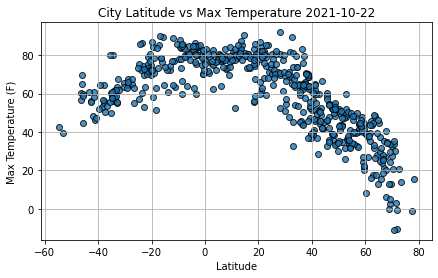

In [15]:
date_now = datetime.date(datetime.now())

# Create a scatter plot for latitude vs max temperature.
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Max Temp"]

fig1, ax1 = plt.subplots(figsize=(7,4))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.title(f"City Latitude vs Max Temperature {date_now}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("../output_data/latitude_vs_max_temp.png", bbox_inches="tight")
plt.show()

## Latitude vs. Humidity Plot

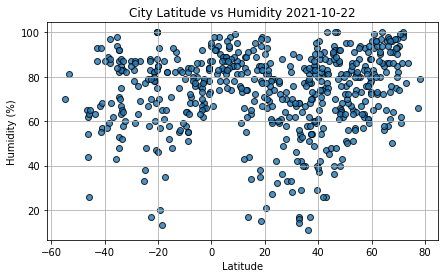

In [16]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Humidity"]

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity {date_now}")
plt.grid()

# Save the figure
plt.savefig("../output_data/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

## Latitude vs. Cloudiness Plot

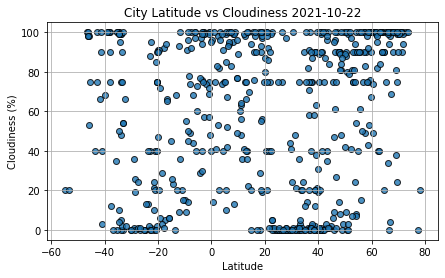

In [17]:
# Create a scatter plot for latitude vs cloudiness.
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Clouds"]

fig1, ax1 = plt.subplots(figsize=(7,4))
markersize=12
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness {date_now}")
plt.grid()

# Save the figure
plt.savefig("../output_data/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

## Latitude vs. Wind Speed Plot

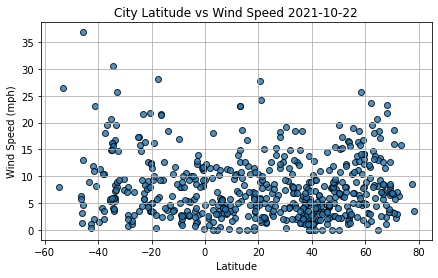

In [18]:
# Create a scatter plot for latitude vs wind speed.
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Wind Speed"]

fig1, ax1 = plt.subplots(figsize=(7,4))
markersize=12
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed {date_now}")
plt.grid()

# Save the figure
plt.savefig("../output_data/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()


## Linear Regression

In [19]:
# Create a function to create Linear Regression plots for remaining activities
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    fig1, ax1 = plt.subplots(figsize=(7,4))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    date_now = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {date_now}",fontsize = 15)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
   # correlation = linregress.pearsonr(x_values, y_values)
   # print(f"The correlation between both factors is {round(correlation[0],2)}")

In [20]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_weather_df = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern_hemi_weather_df = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7535071398282818


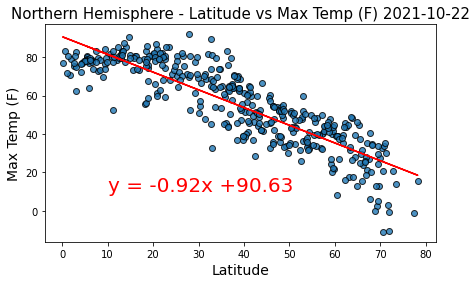

In [21]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemi_weather_df["Lat"]
y_values = northern_hemi_weather_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern", (10, 10))

# Save the figure
plt.savefig("../output_data/northern_hem_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5504700389097332


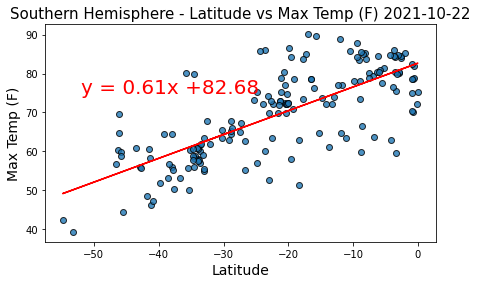

In [22]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemi_weather_df["Lat"]
y_values = southern_hemi_weather_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Southern", (-52, 75))

# Save the figure
plt.savefig("../output_data/southern_hem_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005332445379105486


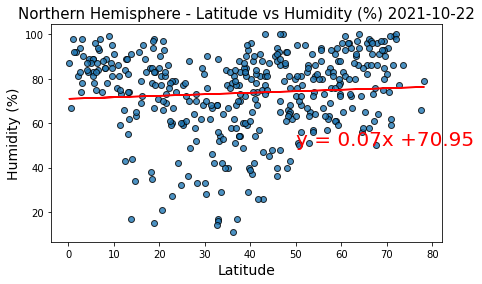

In [23]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(50,50))
plt.savefig("../output_data/northern_hem_linear_lat_vs_humidity.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.007100946871600586


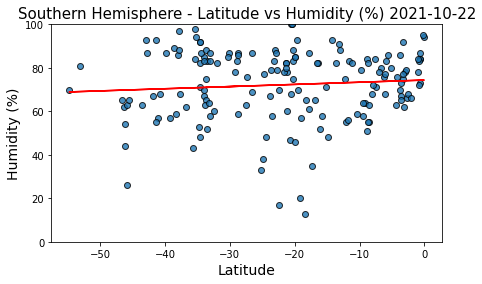

In [24]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values = southern_hemi_weather_df['Lat']
y_values = southern_hemi_weather_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(50, 50), 100)
plt.savefig("../output_data/southern_hem_linear_lat_vs_humudity.png", bbox_inches="tight")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02538408983570023


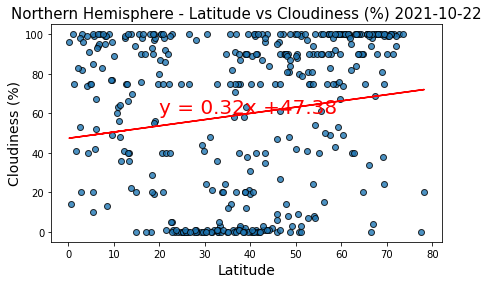

In [25]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Clouds']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern", (20, 60))

plt.savefig("../output_data/northern_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007620333886184847


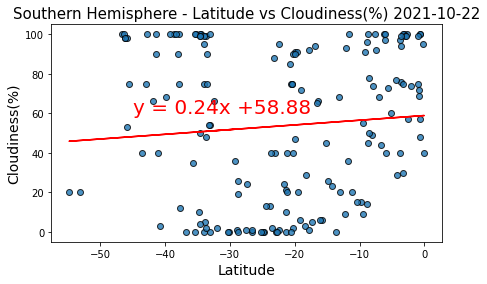

In [26]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemi_weather_df['Lat']
y_values = southern_hemi_weather_df['Clouds']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))
plt.savefig("../output_data/southern_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02123365311318519


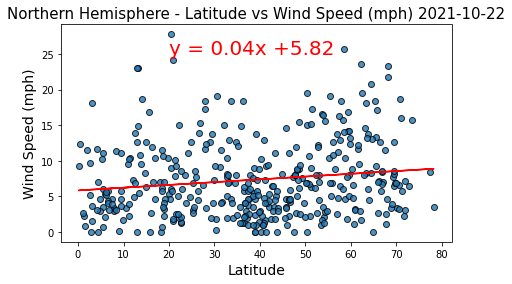

In [27]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))
plt.savefig("../output_data/northern_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04097966629956104


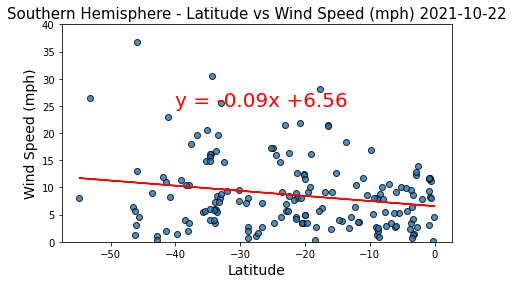

In [29]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemi_weather_df['Lat']
y_values = southern_hemi_weather_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)
plt.savefig("../output_data/southern_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

In [ ]:
#Reference: https://github.com/poonam-ux/Python_API_WeatherPy_VacationPy 